# Logistic Regression - Classifying Video Types

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import pandas.plotting as pdplot
# from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn import metrics

In [2]:
df = pd.read_csv('data/lecture vs lab model.csv')

''

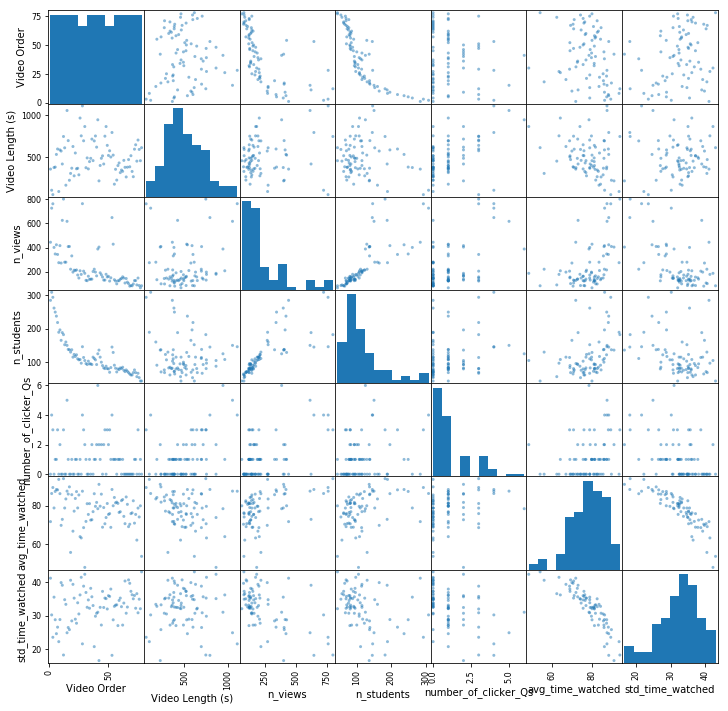

In [3]:
pdplot.scatter_matrix(df, alpha=0.5, figsize=(12, 12))
''

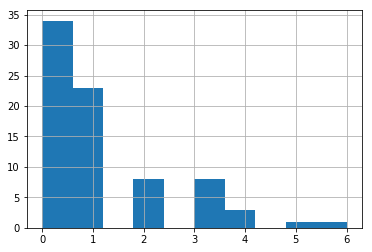

In [7]:
df['number_of_clicker_Qs'].hist()

## Dealing with number of clicker questions

Sine it seems like the number of clicker questions isn't going to be a good feature to have multiple values, I've changed it to either be true or false

In [10]:
df['has_clicker_questions'] = df.apply(lambda row: 1 if row['number_of_clicker_Qs']>0 else 0, axis=1)

In [13]:
df.columns

Index(['Video Order', 'Title', 'Video Length (s)', 'video_type', 'n_views',
       'n_students', 'number_of_clicker_Qs', 'avg_time_watched',
       'std_time_watched', 'has_clicker_questions'],
      dtype='object')

In [49]:
LR = LogisticRegression()


In [50]:
train_ids = np.random.choice(df['Video Order'], 50)
train = df[df['Video Order'].isin(train_ids)]
test = df[~df['Video Order'].isin(train_ids)]

In [51]:
features = ['Video Order','Video Length (s)', 'n_views',
       'n_students', 'avg_time_watched',
       'std_time_watched', 'has_clicker_questions']

train_x = train[features]
train_y = train['video_type']

In [52]:
test_x = test[features]
test_y = test['video_type']

In [61]:
lrfit = LR.fit(train_x, train_y)

In [64]:
lrfit.score(train_x, train_y)

0.97222222222222221

In [67]:
predictions = LR.predict(test_x)

In [68]:
 metrics.confusion_matrix(test_y, predictions)

array([[ 8,  0],
       [ 3, 31]])